Choose reviewers
----------------

In [4]:
import csv

In [5]:
import glob
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [7]:
from tqdm import tqdm

In [36]:
with open('reviewers.txt', 'r') as textfile:
    names = textfile.read()

In [37]:
names = names.split('\n')

In [38]:
names = names[:-2]

In [39]:
del names[521]

In [40]:
len(names)

1273

In [41]:
keywords = ['evolutionary dynamics', 'evolutionary stability', 'game theory',
            "poachers' interactions", 'rhinoceros', 'rhino']

In [43]:
def read_author_files(author):
    dfs = []
    for filename in glob.glob('data/reviews/{}*.json'.format(author)):
        dfs.append(pd.read_json(filename))
    df = pd.concat(dfs, ignore_index=True)
    
    return df

In [47]:
def check_keyword_in_abstract(key, df):
    
    temp = df[df['abstract'].str.contains(key, case=False, na=False)]
    
    return len(temp) !=0

In [48]:
def find_reviewers(names, keywords):
    
    authors_with_no_articles = []
    authors_of_interest = []
    for name in tqdm(names):
        try:
            df = read_author_files(name)
            df = df.dropna()
            
            for key in keywords:
                flag = check_keyword_in_abstract(key, df)
                if flag == True:
                    authors_of_interest.append((name, key))
        except ValueError:
            authors_with_no_articles.append(name)
    
    return authors_of_interest, authors_with_no_articles

In [50]:
# keep, no_keep = find_reviewers(names, keywords)

In [29]:
textfile = open('reviewers_of_interest.txt', 'w')  # Open the file in write mode
for i in keep:
    textfile.write(str(i) + "\n")
textfile.close()  

Analyse results
--------------

In [51]:
with open('reviewers_of_interest.txt', 'r') as textfile:
    reviewers_of_interest = textfile.read()

In [52]:
reviewers_of_interest = reviewers_of_interest.split('\n')

In [53]:
len(reviewers_of_interest)

90

In [54]:
series = [name.split(',') for name in reviewers_of_interest]

In [55]:
df = pd.DataFrame(series, columns=['name', 'keyword'])

In [56]:
import random
import string

In [57]:
labels = [''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(3)) for 
          _ in range(len(df))]

In [58]:
df = df[:-1]

In [59]:
len(df)

89

In [60]:
len(labels)

90

In [61]:
df.tail()

,name,keyword
84,('Pryke James','evolutionary stability')
85,('Robertson Mark','rhino')
86,('Roche Benjamin','game theory')
87,('Roy Helen','evolutionary dynamics')
88,('Roy Helen','rhino')


In [65]:
font = {'size'   : 15,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [63]:
data = df.groupby(['name']).count().sort_values('keyword')

In [64]:
data.head()

,keyword
name,
('Abella Scott',1
('Kingston Tigga',1
('Kaiser Michel',1
('Jung Vincent',1
('Jones Jennifer',1


In [68]:
color = '#fdf6e3'

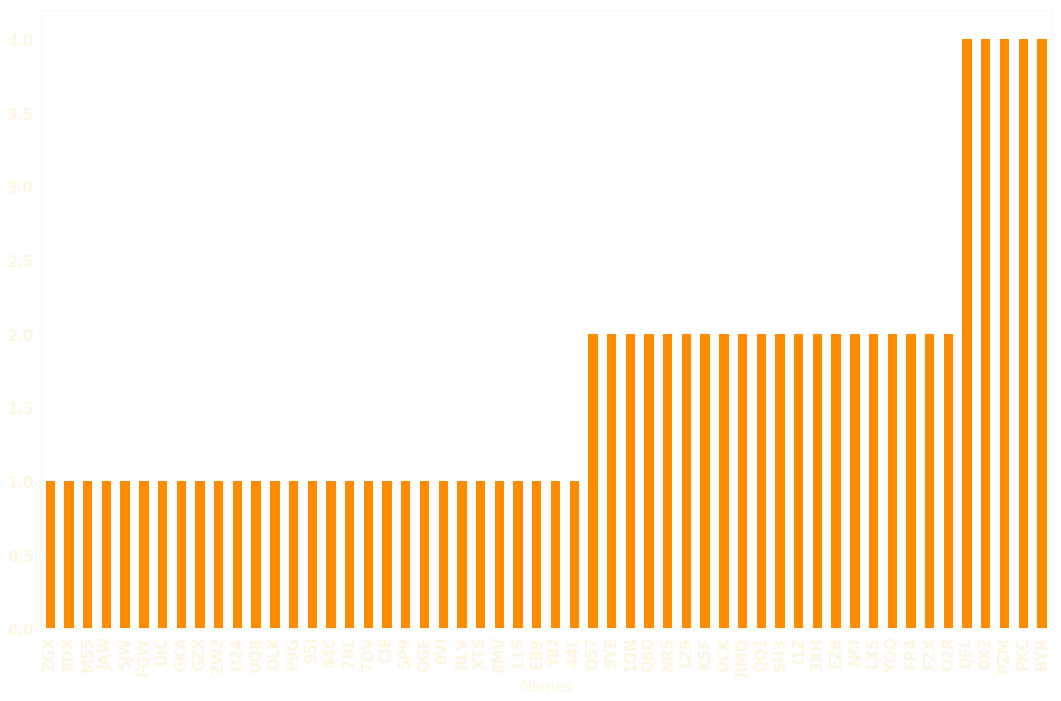

In [76]:
fig, ax = plt.subplots();
ax = data.plot(kind='bar', figsize=(15, 10), legend=False, ax=ax, color='darkorange');
ax.set_xticklabels(labels);
ax.set_xlabel('Names', fontsize=15, color=color);

ax.tick_params(colors=color)
for side in ax.spines:
    ax.spines[side].set_color(color)
    
plt.tight_layout()
fig.savefig('/home/nightwing/posts_images/reviewers_hist.pdf', bbox_inches='tight',transparent=True)

In [20]:
df.sort_values('keyword')[:20]

,name,keyword
0,('Abella Scott','evolutionary dynamics')
71,('Matthews Jeffrey','evolutionary dynamics')
60,('Roy Helen','evolutionary dynamics')
87,('Roy Helen','evolutionary dynamics')
23,('Getz Wayne','evolutionary dynamics')
17,('Ducatez Simon','evolutionary dynamics')
12,('Bro-Jørgensen Jakob','evolutionary dynamics')
10,('Bergmeier Erwin','evolutionary dynamics')
44,('Matthews Jeffrey','evolutionary dynamics')
57,('Pryke James','evolutionary stability')


In [155]:
df[df['name'] == "('Law Brad'"]

,name,keyword
35,('Law Brad','rhinoceros'
36,('Law Brad','rhino'
62,('Law Brad','rhinoceros'
63,('Law Brad','rhino'
